<a href="https://colab.research.google.com/github/jinnatulraihanmumu/Spam-Checker/blob/main/YouTube_Spam_Comment_Checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Youtube comments check for spam by Jinnatul
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

data = pd.read_csv("Youtube-Data.csv")
# print(data.sample(5)) #This will print 5 random rows from the dataset

# print(data.isnull().sum())

# Since we only require content and class columns, we will update our existing datafram to the following
data = data[['CONTENT','CLASS']]

# We will map 0 to not spam and 1 to span in class column
data["CLASS"] = data['CLASS'].map({0:'NOT A SPAM COMMENT', 1: 'SPAM COMMENT'})
# print(data.sample(5))

x = np.array(data['CONTENT'])
y = np.array(data['CLASS'])

"""
As the output of this problem will either be 0 or 1,i.e, the problem of binary classification,
we can use the Bernoulli Naive Bayes algorithm to train the model:
"""

cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.2,random_state= 42)

model = BernoulliNB()
model.fit(xtrain,ytrain)

print(model.score(xtest,ytest))

# Its time to check the model by giving spam and non-spam comments

S = input("Enter a comment : ")
d = cv.transform([S]).toarray()
print(model.predict(d))

0.8223642172523962
Enter a comment : Eww, this is gross
['NOT A SPAM COMMENT']


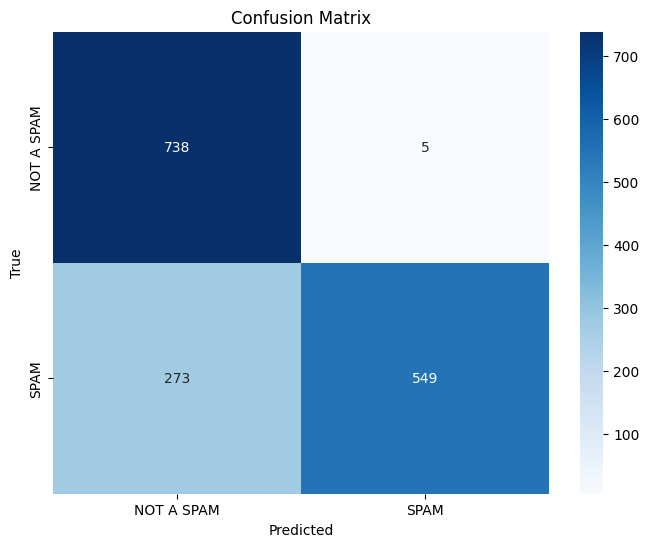

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
y_pred = model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['NOT A SPAM', 'SPAM'], yticklabels=['NOT A SPAM', 'SPAM'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

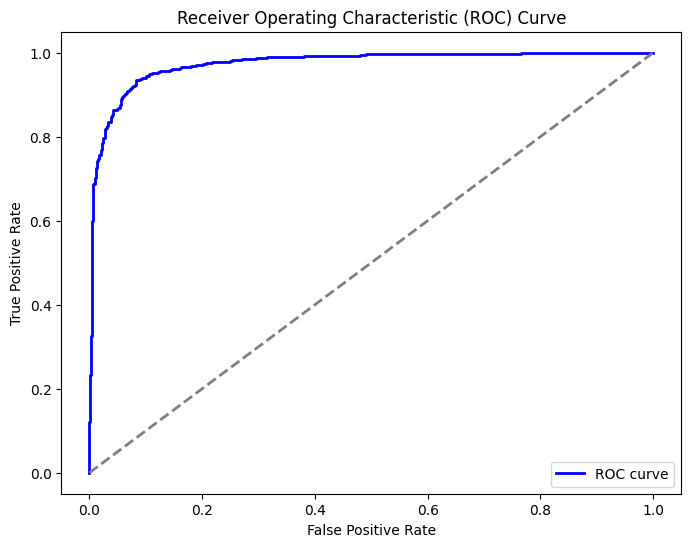

AUC Score: 0.974129998395405


In [6]:
from sklearn.preprocessing import LabelBinarizer

# Convert labels to binary format
lb = LabelBinarizer()
ytest_bin = lb.fit_transform(ytest)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ytest_bin, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(ytest_bin, y_pred_proba)
print("AUC Score:", auc_score)